## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Uditi Shah
    - Email: us54@drexel.edu
- Group member 2
    - Name: Yifan Wang
    - Email: yw827@drexel.edu
- Group member 3
    - Name: Marissa Lynch
    - Email: ml3758@drexel.edu
- Group member 4
    - Name: NA
    - Email: NA

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Assignment group 2: Network and exploratory data analysis

## Module A _(65 pts)_ Exploring averages, sentiment, and time series
In this section we're going to experiment with the word-based text sentiment data generated by a research project documented in the following publication:

- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#pone.0026752.s001

These data are packaged with the assignment in the following directory:

- `./data/Data_Set_S1.txt`

Here's the caption describing the data, from their paper:

> Data from Mechanical Turk study. labMT 1.0 = language assessment by Mechanical Turk 1.0. In the supplementary tab-delimited file named Data Set S1, we provide our set of 10,222 words, their average happiness evaluations according to users on Mechanical Turk, and other information as described below. Please cite the present paper when using this word set. Within papers, we suggest using the abbreviation labMT 1.0 when referencing this data set. The words are ordered according to average happiness (descending), and the file contains eight columns: (1) word, (2) rank, (3) average happiness (50 user evalutions), (4) standard deviation of happiness, (5) Twitter rank, (6) Google Books rank, (7) New York Times rank, (8) Music Lyrics rank. The last four columns correspond to the ranking of a word by frequency of occurrence in the top 5000 words for the specified corpus. A double dash ‘–’ indicates a word was not found in the most frequent 5000 words for a corpus. Please see the main paper for more information regarding this data set.

Note, the paper refers to the scorings as 'happiness' values, but these are also referred to as 'valence', which is a measure of poistive/negative 'affect', or 'sentiment'.

__A1.__ _(2 pts)_ To start, write a function called `load_labMT`, which takes a string argument called `path_to_labMT` that contains the path to a `.txt` file containing the data and loads the dataset with `pandas` into a dataframe.

\[Hint. Since the folks who put these data together put a few lines (3) of descriptive text&mdash;not data&mdash;use the `skiprows` argument in `pd.read_csv()` to start parsing/loading into the dataframe at the appropriate line. Just be sure to keep the header!!

In [110]:
import pandas as pd

def load_labMT(path_to_labMT):
    labMT = pd.read_csv('./data/Data_Set_S1.txt', sep='\t', skiprows=3)
    return labMT

In [111]:
# A1:SanityCheck

labMT = load_labMT("./data/Data_Set_S1.txt")

print(labMT.head())

        word  happiness_rank  happiness_average  happiness_standard_deviation  \
0   laughter               1               8.50                        0.9313   
1  happiness               2               8.44                        0.9723   
2       love               3               8.42                        1.1082   
3      happy               4               8.30                        0.9949   
4    laughed               5               8.26                        1.1572   

  twitter_rank google_rank nyt_rank lyrics_rank  
0         3600          --       --        1728  
1         1853        2458       --        1230  
2           25         317      328          23  
3           65        1372     1313         375  
4         3334        3542       --        2332  


__A2.__ _(3 pts)_ Write a function called  `make_histogram` which plots a 25-bin histogram of the `'happiness_average'` column. In this, compute and plot the locations of the `mean` and `median` as `'red'` and `'blue'` vertical lines, respectively. 

In [112]:
# A2:Function(2/3)

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def make_histogram(labMT):
    
    fig = plt.figure(figsize = (6,6))
    
    #--- Your code starts here
    happiness_values = labMT['happiness_average']

    mean = np.mean(happiness_values)
    median = np.median(happiness_values)

    plt.hist(happiness_values, bins=25, alpha=1, density=True, color='gray')

    
    #--- Your code starts here
    
    axes = plt.gca()
    plt.plot([mean, mean], axes.get_ylim(), color = 'red')
    plt.plot([median, median], axes.get_ylim(), color = 'blue')
    plt.ylabel('Frequency', fontsize = 15)
    plt.xlabel('Valence', fontsize = 15)
    return fig

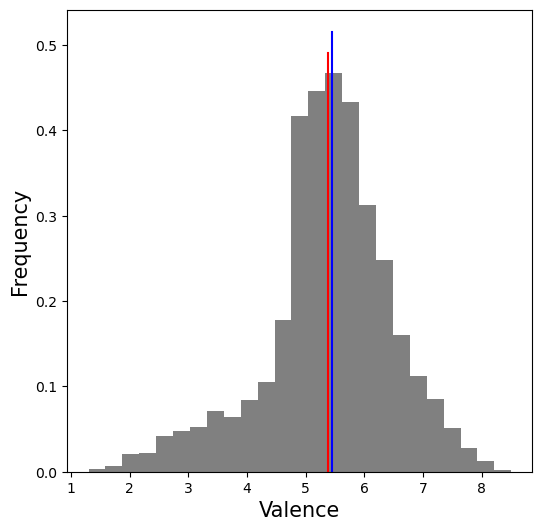

In [113]:
# A2:SanityCheck

fig = make_histogram(labMT)

In [114]:
# A2:Inline(1/3)

# Look at the visualization, is the median or mean larger? Print "Median" or "Mean".
print("Median")

Median


__A3.__ _(3 pts)_ Now complete the `plot_average_vs_deviation` function, which compares the `'happiness_average'` (created as an average of 50 survey responses) `'happiness_standard_deviation'` column from these 50-respondant cohorts. In particular, make a scatter plot of the `'happiness_standard_deviation'` (vertical) against the `'happiness_average'` (horizontal) column. Again, be sure to clearly label axes and adjust any arguments to make this picture as clear and interpretable as possible.

\[Hint. Be sure to utilize the `color` and `alpha` arguments to highlight variations in point density.\]

In [115]:
# A3:Function(2/3)

def plot_average_vs_deviation(labMT):
    fig = plt.figure(figsize = (6,6))
    
    #--- Your code starts here
    happiness_average = labMT['happiness_average']
    happiness_standard_deviation = labMT['happiness_standard_deviation']
    
    # Create the scatter plot
    plt.scatter(happiness_average, happiness_standard_deviation, color = 'k',
    s = 2,
    alpha = .2)
    
    
    #--- Your code ends here
    
    plt.ylabel('Valence $\sigma$', fontsize = 15)
    plt.xlabel('Valence', fontsize = 15)
    return fig

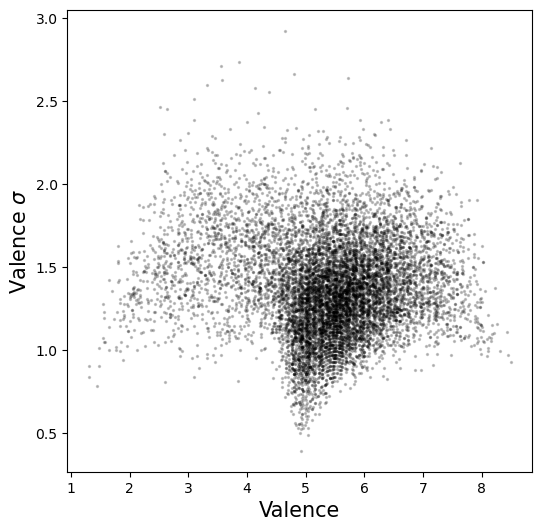

In [116]:
# A3:SanityCheck

fig = plot_average_vs_deviation(labMT)

In [117]:
# A3:Inline(1/3)

# Look at the visualization, is the distribution denser at left or right? Print "Left" or "Right".
print("Right")

Right


__A4.__ _(2 pts)_ One of the columns is labeled `'nyt_rank'`, which indicates the rank (by frequency) of each given word in a corpus of all New York Times (NYT) articles from the 20-year period, 1987&ndash;2007. This is provided because the ~10k words that constitute the data were, in part, drawn from this 20-year corpus of articles. Thus, the words in `./data/Data_Set_S1.txt` data are specially tuned for application to a corpus text drawn from the NYT.

So to match, frequencies are provided for the same ~10k words for each daily issue of the NYT in the 20-year corpus. These are contained in the file:

- `"./data/nyt.csv"`

which will available in the data directory after the compressed file is inflated, i.e., after unzipping from the command line in the data directory:

```
>>> unzip nyt.csv.zip
```

Load these data using `pandas`, store the `.transpose()`'d dataframe as `nyt`, and then set the dataframe's `.columns` attribute to the `'word'` column of the valence dataframe. 

Note: with these data, we're thinking about _time_ as the independent, '`x`' variable, so it's convenient to have the times along the rows, and words along the columns&mdash;this is the 'why' for the application of `.transpose()` from the shape of the `nyt` data on file.

_Response._ There were $7475$ times and $10222$ words, making the dimension compatible with the valence data.

In [118]:
# A4:Function(2/2)

import pandas as pd

def load_nyt(path_to_nyt, labMT):

    #--- Your code starts here
    nyt = pd.read_csv('data/nyt.csv')
    nyt = nyt.transpose()
    nyt.columns = labMT['word']
    #--- Your code ends here

    return nyt

In [119]:
# A4:SanityCheck

# load nyt and print its shape (matrix dimensions)
nyt = load_nyt('./data/nyt.csv', labMT)
print(nyt.shape)

(7475, 10222)


__A5.__ _(5 pts, total)_ While the valence values were detemined by survey and may be skewed, the histogram from __A2__ doesn't reflect the frequency with which the words were actually used. For this part, your job is to repeate the histogram picture, but with weighted values, including the computation of mean and median lines.

So, write a function that computes the mean and median as weighted quantities, according to the occurrence of words in the articles. So intuitively, if the most positive word (`'laughter'`, `happiness_average = 8.5`) appeared 100 times across the NYT, there would be 100 instances of the value 8.5 to incorporate into each of the mean and median calculations.

__Weights.__ To start, total the frequencies in the NYT data across time (collapsing rows) into a single vector: $\vec{F} = [F_1, \cdots, F_n]$ (use the `axis` argument in the `.sum()` method and name the resulting object `F`). Using this, record the total number of words in the entire dataset: `N = F.sum()`. Print `N` once calculated, below.

In [120]:
# A5:Inline(1/5)

# total the frequencies in the NYT data across time (collapsing rows) into a single vector
# record the total number of words in the entire dataset (sum F)

#--- Your code starts here

#total frequencies of each word across time (collapse rows)
F = nyt.sum(axis = 0)

#calculate total number of words in the dataset
N = F.sum()
#--- Your code ends here

# print the number of words in the entire dataset, it should be 868729965
print(N)

868729965


__Mean.__ For the mean you'll have to use $\vec{F}$ in a sum formula that groups the contributions of words according to their $F_i$ weights:
$$
\overline{h} = \frac{\sum_{i=1}^nh_i\cdot F_i}{\sum_{i=1}^nF_i} = \frac{1}{N}\sum_{i=1}^nh_i\cdot F_i,
$$
Here, the $h_i$ indicate the valence values for the words, and the denominator $N = \sum_{i=1}^nF_i$ is equal to the total number of words that appeared in the dataset (as above). Print the mean once calculated, below.

In [121]:
# A5:Inline(1/5)

# average the `'happiness_average'` column by using the F weights

#--- Your code starts here
import numpy as np

#calculate weighted mean
mean = np.dot(labMT['happiness_average'], F) / N
#--- Your code ends here

# print the average of average hapiness, it should be about 5.3687
print(mean)

5.368698927128639


__Median.__ While the above mean can be easily computed  via sums and dot products the 'weighted' median is more challenging. In particular, the median considers the middle-most word according to a sort from low to high by valence. 

Since we now have frequencies of occurrence for each word, we have to _cumulatively_ count up the frequencies in order of increasing (or decreasing) valence. The median will be the word/valence over which half&mdash;$N/2$&mdash;of the frequency in $\vec{F}$ accumulates.

The valence data are already sorted from high to low. But this is a special case&mdash;we're looking for the 50th percentile. So, we can take cumulative sums of `F` to identify the word for which $N/2$ accumulates. In particular, use the `.cumsum()` method on `F` to identify the median word/valence appearing at $N/2$. Print the median once calculated, below.

In [122]:
# A5:Inline(1/5)

# find the median of the weighted distribution using a cumulative sum of F

    #--- Your code starts here
F_sum = np.cumsum(F)
# Find the index where the cumulative sum reaches or exceeds N / 2
median_index = np.where(F_sum >= N / 2)[0][0]

# Get the weighted median valence
median = labMT['happiness_average'][median_index]
    
    #--- Your code ends here
    
    # Print the weighted median
print(median)

5.24


__Histogram.__ Now write an updated function, called `make_weighted_histogram` which uses $\vec{F}$ as a `weights` argument for the histogram to depict your weighted `mean` and `median` from the above parts of this section. Note: you may reuse much of your histogram code from __A2__ for the visualization.

In [123]:
# A5:Function(1/5)

def make_weighted_histogram(labMT, nyt):
    
    fig = plt.figure(figsize = (6,6))
    
    #--- Your code starts here
    plt.hist(labMT['happiness_average'], weights=F, bins=25, color='gray', alpha=1, density=True)
    #--- Your code starts here
    
    axes = plt.gca()
    plt.plot([mean, mean], axes.get_ylim(), color = 'red')
    plt.plot([median, median], axes.get_ylim(), color = 'blue')
    plt.ylabel('Frequency', fontsize = 15)
    plt.xlabel('Valence', fontsize = 15)
    return fig

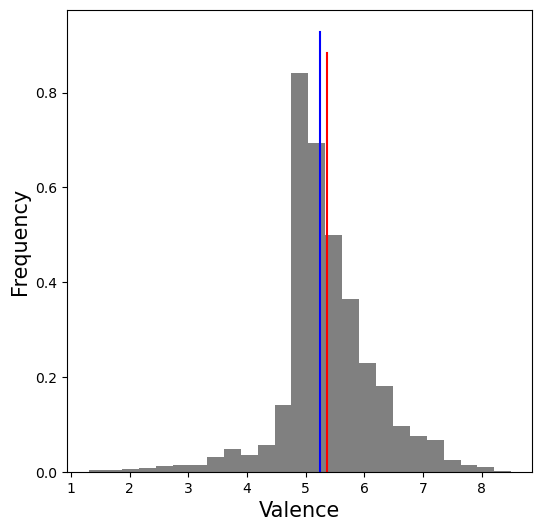

In [124]:
# # A5:SanityCheck

fig = make_weighted_histogram(labMT, nyt)

In [125]:
# A5:Inline(1/3)

# Look at the weighted visualization, is the median or mean larger? Print "Median" or "Mean".
print("Median")

Median


__A6.__ _(2 pts)_ The NYT data are timeseries data, but how can we utilize the temporal information? To get started, modify `nyt`'s to contain parsed `datetime` objects, utilizing the `dateutil.parser.parse()` function. 

\[Hint: to get/modify the index in a dataframe utilize the `.index` attribute.\]

In [126]:
# A6:Inline(2/2)

#--- Your code starts here
import pandas as pd
from dateutil import parser

nyt.index = nyt.index.astype(str)
nyt.index = pd.Series(nyt.index).apply(parser.parse)
#--- Your code ends here

In [127]:
# A6:SanityCheck

nyt.index[:10]

DatetimeIndex(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04',
               '1987-01-05', '1987-01-06', '1987-01-07', '1987-01-08',
               '1987-01-09', '1987-01-10'],
              dtype='datetime64[ns]', freq=None)

__A7.__ _(3 pts)_ Throughout this assignment we're going to want to be able to standardize the columns of our time series. So, your job here is to write a function called `standardize(ts)` that accepts a time series dataframe `ts` (like `nyt`) as input, and outputs a timeseries of same shape, containing the standardized columns of `ts`.

For `nyt`, standardizing the columns will allow comparability words, since they occur at very different frequencies. So when `standardize()` processes `nyt`, the $i^\text{th}$ word at time $t$ should be transformed to: 
$$
\frac{f_{t,i} - \mu_T(f_i)}{\sigma_T(f_i)}
$$

In [128]:
# A7:Function(2/3)

def standardize(ts):
    
    #--- Your code starts here
    mean_vals = ts.mean()
    std_vals = ts.std()
    
    std_ts = (ts - mean_vals) / std_vals
    #--- Your code ends here
    
    return std_ts


In [129]:
# A7:SanityCheck
word_series = standardize(nyt)
print(word_series["year's"].head(10))

1987-01-01    4.413275
1987-01-02    4.694062
1987-01-03    1.698998
1987-01-04    4.506871
1987-01-05    1.605402
1987-01-06    1.792594
1987-01-07    0.201466
1987-01-08   -0.172917
1987-01-09    0.482253
1987-01-10   -0.360109
Name: year's, dtype: float64


In [130]:
# A7:Inline(1/3)

# Look at your output, does the word occur at above- or 
# below-average frequency at the beginning of the year? 
# Print "Above" or "Below".
print("Above")

Above


__A8.__ _(10 pts)_ Now write a function called `plot_series(ts, start, stop)` that plots the columns of a time series `ts`, like `word_series` (or `nyt`), as line plots of a range in time specified by strings `start` and `stop` in the format `yyyy-mm-dd`. Be sure to make your visualization as interpretable as possible, specifically utilizing both `label`s for columns and transparency of line color (`alpha`).

\[Hint. to retrieve values in the temporal plotting range defined by `start` and `stop`, use boolean masks.\]

In [131]:
def plot_series(ts, start, stop, ylabel, legend=True):

    ts.index = pd.to_datetime(ts.index)

    start_dt = pd.Timestamp(start)
    stop_dt = pd.Timestamp(stop)

    mask = (ts.index >= start_dt) & (ts.index <= stop_dt)

    ts_subset = ts.loc[mask]
 
    fig, ax = plt.subplots(figsize=(12, 8))
    for col in ts_subset.columns:
        ax.plot(ts_subset.index, ts_subset[col], label=col, alpha=0.8)

    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel("Date", fontsize=15)

    if legend:
        ax.legend()

    plt.tight_layout()
    plt.show()
    
    return fig

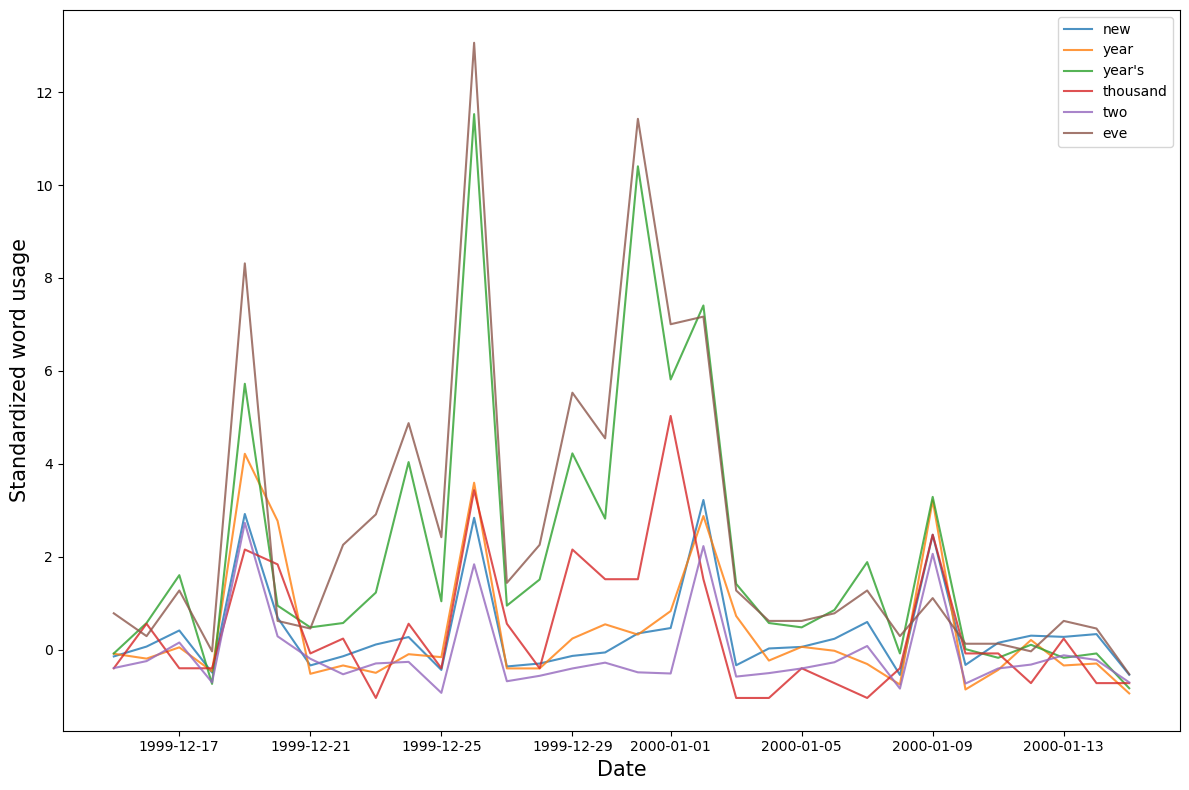

In [132]:
# A8:SanityCheck

words = ['new', 'year', "year's", 'thousand', 'two', 'eve']        
fig = plot_series(word_series[words], "12-15-1999", "01-15-2000", "Standardized word usage")

In [133]:
# A8:Inline(2/10)

# Look closely at your output, what word seems to associate with the
# standardized usage of "year's" most closely?
# Print one of 'new', 'year', 'thousand', 'two', or 'eve'.

print("eve")

eve


__A9.__ _(7 pts)_ One common aspect of time series' is the presence of 'uninteresting' trends (at least from the point of view of the desired analysis). Generally, de-trending can be done by characterizing a trend&mdash;a regularity desired for removal&mdash;and  removing it, either by subtraction or division. Right now, our interest will be focused on spikes that may represent events outside of an 'everyday routine', so we will be _de-trending weekly signatures_. 

So, create a function called `detrend_weekly(ts)` that takes a time series `ts`, computes the average day-of-week values for each column, and the divides column values them by their respective averages from the corresponding days of week. The function should `return` a dataframe the same shape as `ts`.

Finally, comment in the markdown cell below as to any changes that occur when the weekly trend is removed. What do you think these changes tell you about the data, i.e., word frequencies in NYT articles? Do you think the issues for the different days of the week were generally of the same size?

\[Hint: Python support 'triple-index' slicing, for which the third index indicates a step-size for the slice, i.e, for a list `lst`, `lst[0:401:10]` will result in every `10`th value from index `0` to `400`, i.e., `[0, 10, 20, ..., 400]`.\]

Finally, comment in the markdown cell below as to any changes that occur when the weekly trend is removed. What do you think these changes tell you about the data, i.e., word frequencies in NYT articles? Do you think the issues for the different days of the week were generally of the same size?

--- Removing weekly trends should help you observe whether certain days of the week consistently show higher or lower word frequencies compared to others. If a word appears more frequently on weekends or specific weekdays, this normalization will help highlight such patterns.

--- After applying this detrending process, you might notice a more uniform distribution of word frequencies over time, indicating that previously observed variations were primarily due to weekly cycles rather than actual changes in content. This can help in focusing on more subtle, non-weekly-related trends in the data.

In [170]:
def detrend_weekly(ts):

    detrend_data = ts
    
    for i in range(0,7):
        day_avg = ts[i::7].mean(axis = 0)
        detrend_data[i::7] = ts[i::7] / day_avg
    
    return detrend_data
    
words = ['new', 'year', "year's", 'two', 'eve', 'thousand']
start = '1999-12-15'
stop = '2000-01-15'

/var/folders/tt/xd_dfncs1w73lpcz6r380h640000gn/T/ipykernel_48446/3285641353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data[i::7] = ts[i::7] / day_avg
/var/folders/tt/xd_dfncs1w73lpcz6r380h640000gn/T/ipykernel_48446/3285641353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data[i::7] = ts[i::7] / day_avg


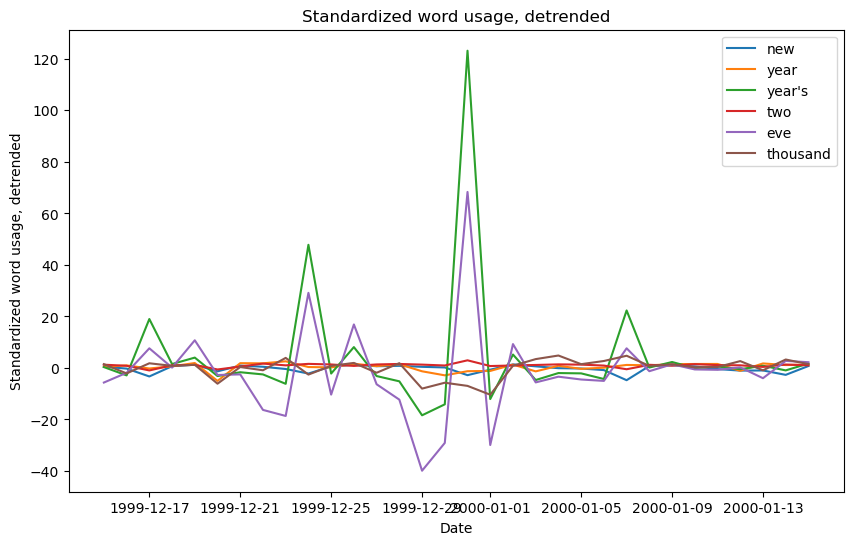

In [171]:
# A9:SanityCheck

fig = plot_series(detrend_weekly(word_series[words]), "12-15-1999", "01-15-2000", "Standardized word usage, detrended")

In [172]:
# A9:Inline(2/7)

# Look closely at your output, does removing
# the day-of-week signature bring the words 'year' and "year's"
# closer together or farther apart over this range?
print("farther")

farther


__A10.__ _(8 pts)_ Next up, your job is to produce a function called `avgs(ts, stop = 0)`, which produces a timeseries of average valence values for a times series, `ts`, e.g., the entire 20-year range of `nyt`. 

In particular, for a given day, $t$, the average daily value should be

$$
\overline{h}_t = \frac{ \sum_{i=1}^nh_i\cdot f_{t, i}}{\sum_{i=1}^nf_{t,i}},
$$

The argument `stop` indicates the size of a 'stop word window' (see the valence-data authors' paper to supplement details) of valence values for words to be omitted from the calculation. So, if `stop = 1` and the $i^\text{th}$ word has valence $h_i$ inside the window (i.e., $h_i\in [4,6]$), then $h_i\cdot f_{t, i}$ and $f_{t, i}$ should be excluded from the above sum's numerator and denominator, respectively. 

\[Hint: use `.dot()` products and `.sum()` methods on boolean masks of `ts`, slicing the non-stop words for fast calculation.] 

In [195]:
import numpy as np

def avgs(ts, stop=0):
    # Create a boolean mask for words to include based on the stop window
    boolean_filter = (labMT['happiness_average'] <= 5 - stop) | (labMT['happiness_average'] >= 5 + stop)
    include_words = labMT.loc[boolean_filter, 'word'].to_list()
    
    # Filter the time series to include only words that pass the filter
    f_keep = ts[include_words]
    h_keep = labMT.loc[boolean_filter, 'happiness_average']
    
    # Compute average daily valence values
    # dot product of filtered time series and valence values, divided by the sum of filtered time series
    mean_ts = np.dot(f_keep, h_keep) / f_keep.sum(axis=1)
    
    return mean_ts

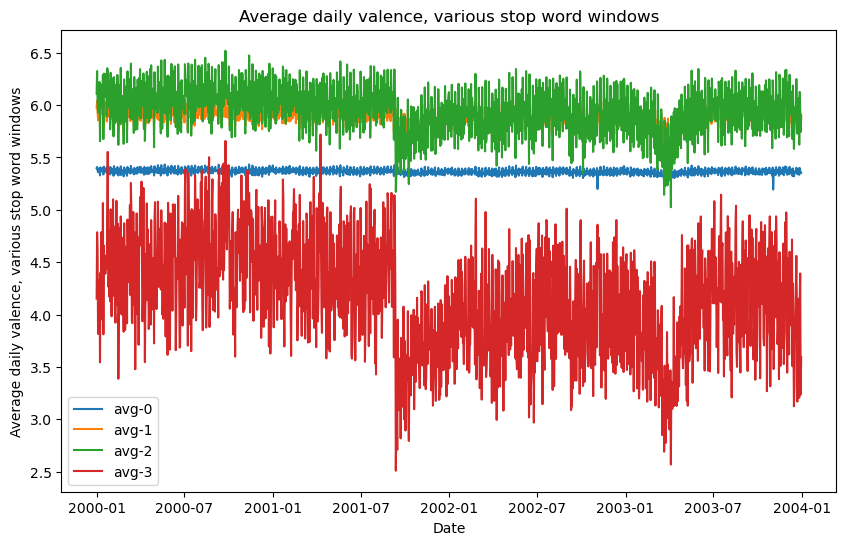

In [196]:
# A10:SanityCheck

avgs_series = pd.DataFrame({'avg-' + str(stop): avgs(nyt, stop = stop) 
                            for stop in range(4)}, 
                           index = nyt.index)
    
fig = plot_series(avgs_series, "2000-01-01", "2003-12-31", 
                  "Average daily valence, various stop word windows")

In [197]:
# A10:Inline(2/8)

# Look closely at your output, as the stop-word removal window widens,
# do the magnitude of the values swing wider or narrower?
print("wider")

wider


__A11.__ _(8 pts)_ One thing you might've noticed from the previous part was that the calculated averages were rather noisy, preventing us from observing long-term trends and big events. So, let's build a function called `smooth(ts, r = 1)` that takes a time series `ts` (e.g., `avgs_series`) and returns a same-shaped time series dataframe of _moving averages_ of the columns of your `series`.  

Averages are to be taken over the values in a 'window' of radius $r$ about a point in time $t$. In particular, the smoothed value at $t_\text{smooth}$ should be taken over all times $t$ for which 

$$t_\text{smooth} - r < t < t_\text{smooth} + r$$ 

For example, if we call the result `smooth_ts = smooth(ts, r)`, then the values should be:

```
smooth_ts.iloc[i,j] = np.mean(ts[i-r:(i+r)+1, j])
``` 

__Important__: for the edge cases, i.e., when `i < r` or when  `i + r > series.shape[0]`, you'll have to take exta care on indexing to make sure your averages are taken over fewer values. This is the hardest component of this part of the assignment!

In [198]:
# A11:Function(6/8)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def smooth(series, r = 1):
    
    columns = series.columns
    index = series.index
    ts = series.to_numpy()
    
    if r:
        #--- Your code starts here
        
        # Initialize an empty array for smoothed values
        smoothed_ts = np.empty_like(ts, dtype=float)
        
        # Iterate over each column to smooth it
        for j in range(ts.shape[1]):
            for i in range(ts.shape[0]):
                lower_bound = max(0, i - r)
                upper_bound = min(ts.shape[0], i + r + 1)
                smoothed_ts[i, j] = np.mean(ts[lower_bound:upper_bound, j])
        
        # Convert smoothed numpy array back to DataFrame
        smoothed_series = pd.DataFrame(smoothed_ts, index=index, columns=columns)
        
        return smoothed_series
        
    
        #--- Your code stops here
    else:
        return series
    

In [199]:
def plot_series(ts, start, stop, ylabel, legend=True):
    start_dt = pd.Timestamp(start)
    stop_dt = pd.Timestamp(stop)

    mask = (ts.index >= start_dt) & (ts.index <= stop_dt)
    ts_subset = ts.loc[mask]
    
    plt.figure(figsize=(10, 6))
    for col in ts_subset.columns:
        plt.plot(ts_subset.index, ts_subset[col], label=col)
        
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    if legend:
        plt.legend()
    plt.title(ylabel)
    plt.show()


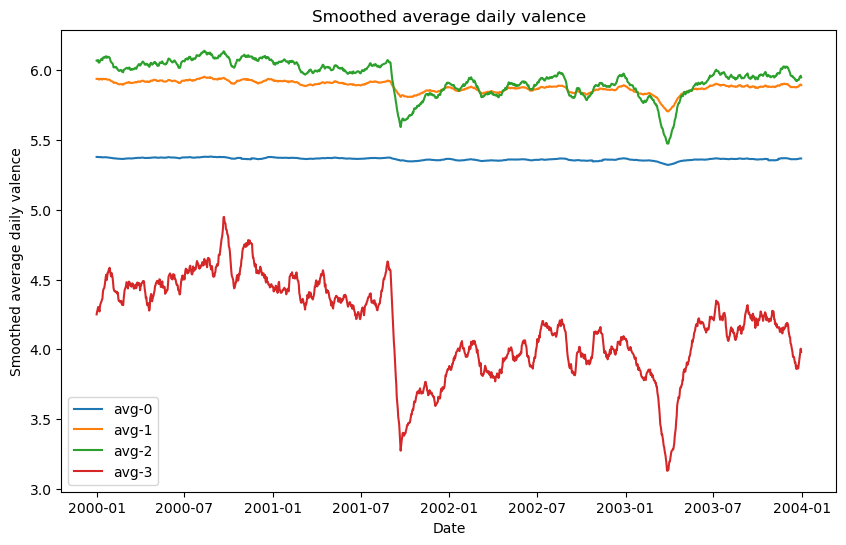

In [200]:
# A11:SanityCheck

fig = plot_series(smooth(avgs_series, r = 10), "2000-01-01", "2003-12-31", "Smoothed average daily valence")

In [201]:
# A11:Inline(2/8)

# Looking at the smoothed shapes, in what year does the 'least happy' 
# dip in the time series occur, 2001 or 2003?
print("2003")

2003


__A12.__ _(2 pts)_ Now, use `plot_series()` again on the `avgs_series` values, but transform them in the following order:

1. `detrend_weekly()`
- `standardize()`
- `smooth()`

and be sure to use the value `r=10` from the previous part of this assignment.

Then, take the resulting time series and apply `plot_series()` to it over the range defined by: 

- `start = "2000-01-01"`
- `stop = "2003-12-31"`

For reference, your output should look like:

![Expected Output](img/a12-expected-output.png)

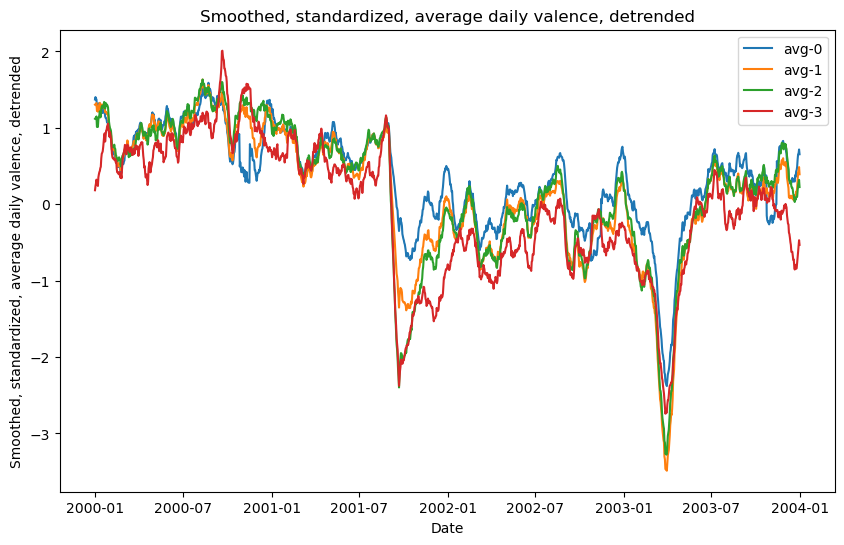

In [202]:
# A12:Inline(1/2)
fig = plot_series(smooth(standardize(detrend_weekly(avgs_series)), 10), 
                  "2000-01-01", "2003-12-31", "Smoothed, standardized, average daily valence, detrended")

In [203]:
# A12:Inline(1/2)

# Decide the range of stop-word windows that think produces the most 'stable' shape. 
# In particular, which two consecutive window sizes appear to exhibit to most similar 
# variation to each other as timeseries'? Respond with one of: 
# "avg-0 ~ avg-1"; "avg-1 ~ avg-2"; "avg-2 ~ avg-3"; or "avg-3 ~ avg-4"

print("avg-1 ~ avg-2")

avg-1 ~ avg-2


__A13.__ _(5 pts)_ While smoothing helped us to visually observe some candidate big events on the time series, it will actually make it more difficult to pin down exactly where these shifts happended, and hence provide clues as to _why_ they happened. This is because one means we have for assessing a big 'drop', or, more generally a 'shift', is by looking at outlier _differences_ in the time series values. 

So, write a new function called `diff(ts)` that calculates _single-step, backward differences_ of `ts` and outputs them as another timeseries dataframe. In particular, this function should subtract the $t-1^\text{st}$ series values from the $t^\text{th}$. 

__Important__: the output of `diff()` should always be one row smaller than its input, since the first (`0`-index) row has none previous to subtract. 

In [204]:
# A13:Function(3/5)

def diff(ts):
    
    #--- Your code starts here
    diffs = pd.DataFrame(index=ts.index[1:], columns=ts.columns)
    for col in ts.columns:
        diffs[col] = ts[col].iloc[1:].values - ts[col].iloc[:-1].values
    #--- Your code starts here
    
    return diffs

Now, apply your code in the following order to `stable_series =  avgs_series[["avg-1"]]`:

1. `detrend_weekly()`
2. `standardize()`
3. `diff()`

Then, using `.sort(by = best_column)` store the result it as `diffs`, print the `.head()` and `.tail()` of the result. For reference, your output should look like:


```
               avg-1
1999-06-19 -5.829010
2001-09-12 -4.232600
1988-07-31 -3.646154
2003-04-05 -3.560870
1998-08-22 -3.480828
               avg-1
1989-01-21  3.605293
1992-07-04  3.893948
1987-10-24  4.071007
2006-03-29  4.643185
1999-06-20  5.286476
```

In [205]:
# A13:SanityCheck

stable_series = avgs_series[["avg-1"]]
diffs = diff(standardize(detrend_weekly(stable_series))).sort_values(by = "avg-1")
print(diffs.head())
print(diffs.tail())

               avg-1
1999-06-19 -5.727568
2001-09-12 -4.144918
1988-07-31 -3.666569
2003-04-05 -3.589309
1998-08-22 -3.508339
               avg-1
1989-01-21  3.524000
1992-07-04  3.908922
1987-10-24  4.028482
2006-03-29  4.611534
1999-06-20  5.200866


/var/folders/tt/xd_dfncs1w73lpcz6r380h640000gn/T/ipykernel_48446/3285641353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data[i::7] = ts[i::7] / day_avg
/var/folders/tt/xd_dfncs1w73lpcz6r380h640000gn/T/ipykernel_48446/3285641353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data[i::7] = ts[i::7] / day_avg


Considering the change of sign (negative for `.head()` and positive for `.tail()`), do you recognize any dates that might correspond to sentiment-charged news reporting major geopolitical events?  

There are a number of reasonable guesses for the timing of events, of course some are more difficult to find than others:

- 1988-07-31: _Negative_, Sultan Abdul Halim ferry terminal bridge collapse
    - https://en.wikipedia.org/wiki/Sultan_Abdul_Halim_ferry_terminal_bridge_collapse
- 1989-01-20: _Positive_, G. Bush Sr. inaugurated as president of USA
    - https://en.wikipedia.org/wiki/Inauguration_of_George_H._W._Bush
- 1992-07-04: _Positive_, 4th of July celebration
- 1999-06-19: _Negative_, House rejects gun control bill, in year of Columbine shooting
    - https://www.nytimes.com/1999/06/19/us/guns-schools-overview-gun-control-bill-rejected-house-bipartisan-vote.html
- 2001-09-12: _Negative_, Sept. 11th attacks
    - https://en.wikipedia.org/wiki/September_11_attacks
- 2003-04-05: _Negative_, Battle of Baghdad
    - https://en.wikipedia.org/wiki/Battle_of_Baghdad_(2003)

Having google and the web helps with dates, and particularly Wikipedia's event category pages: https://en.wikipedia.org/wiki/Category:July_1988_events.

In [206]:
# A13:Inline(1/2)

# While this does pick out some key dates, this is definitely 
# not a perferct event detection tool. Sometimes, if an event measured in this way
# leaves the 'collective attention' quickly, the diff() tool will 
# pick up both positive and negative directions, side-by-side. 
# Determine which of the events exhibits this effect:

# 'Bridge Collapse'; 'Inauguration'; 'July 4th'; 'Gun Control'; 'Sept. 11th'; or 'Battle of Baghdad'
print("Gun Control;")

Gun Control;


__A14.__ _(10 pts)_ To observe candidate events, modify your original `plot_series` function into a new one:

- `plot_series_top_diffs(ts, start, stop, ylabel, top = 5, legend = True)` 

so as to additionally visualize the `top` (most extreme) values determined from an application of `diff()` to `ts`, i.e., the `.head(top)` and `.tail(top)` from the sorted output of `diff()`.  

Beyond `plot_series()`, this function should, intuitively, exhibit 'points on a line' over a specified `start`/`stop` range. As in part __C12__, your final product should exhibit the series with transformations in the following order:

1. `detrend_weekly()`
- `standardize()`
- `smooth()`

Again, be sure to use the value `r=10` from the previous part of this assignment.

__Important:__ `diff()` should only be applied to _un-smoothed_ data. In other words, for the `2*top` points we'd like to retrieve from `diff` the order of transformations should be:

1. `detrend_weekly()`
- `standardize()`
- `diff()`

So, be sure to pass only _detrended_, _standardized_ series to the `plot_series_top_diffs` function. Application of `diff()` and `smooth()` should then be applied to the passed `ts` to identify the `top` times along the `smooth()`'d values for plotting.

Also, as with parts __C10__&mdash;__C13__, your final code should be exhibited over the range

- `start = "2000-01-01"`
- `stop = "2003-12-31"`

but now just in application to the `best_series` values.

In [207]:
# A14:Function(8/10)

def plot_series_top_diffs(ts, start, stop, ylabel, top = 5, legend = True):
    
    #--- Your code starts here
    line_fig = plt.figure(figsize = (12, 6))
    mask = (ts.index >= start) & (ts.index <= stop)
    ts2 = ts.loc[mask]

    diffts = diff(ts2).sort_values(by = "avg-1")
    smoothts = smooth(ts2, 10)
    for word in smoothts:
        plt.plot(smoothts[word].index, smoothts[word], label = word)

    points = diffts.head(top) + diffts.tail(top)
    plt.scatter(smoothts.loc[points.index].index, smoothts.loc[points.index], label = 'top avg-1')
    
    #--- Your code stops here
    
    plt.ylabel(ylabel, fontsize = 15)
    plt.xlabel("Date", fontsize = 15)
    if legend:
        plt.legend()
        
    return fig

When this is complete, exhibit the function's output setting `top = 5`. Then, discuss the locations of these points below in the context of the potential events you identified in __C13__. Is the analysis all consistent?

For reference, your output should look like this:

![Expected Output](img/a14-expected-output.png)

/var/folders/tt/xd_dfncs1w73lpcz6r380h640000gn/T/ipykernel_48446/3285641353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data[i::7] = ts[i::7] / day_avg
/var/folders/tt/xd_dfncs1w73lpcz6r380h640000gn/T/ipykernel_48446/3285641353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data[i::7] = ts[i::7] / day_avg


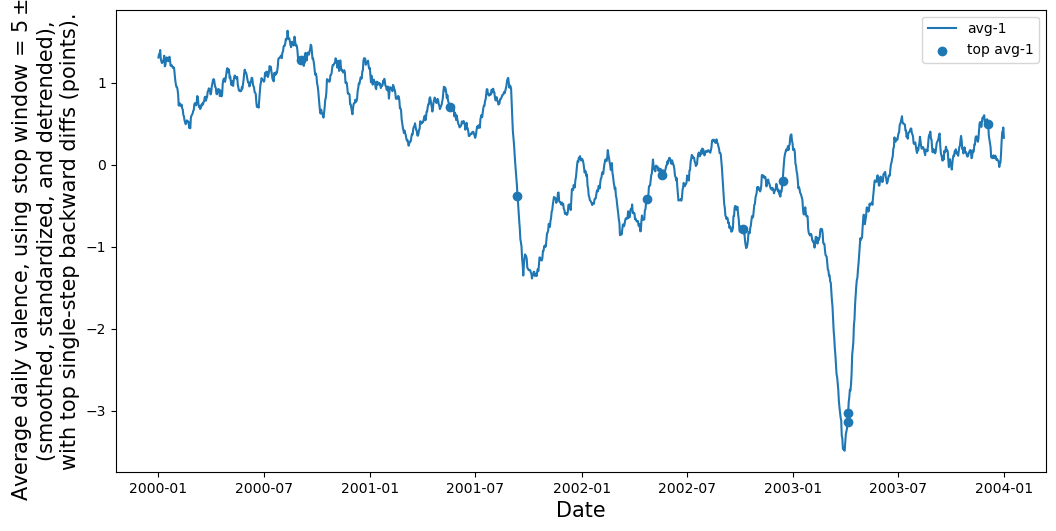

In [190]:
# A14:SanityCheck

fig = plot_series_top_diffs(standardize(detrend_weekly(stable_series)),  
                            "2000-01-01", "2003-12-31", 
                            ("Average daily valence, using stop window = $5\pm 1$\n" + 
                             "(smoothed, standardized, and detrended),\n" + 
                             "with top single-step backward diffs (points)."), 
                            top = 5)

In [191]:
# A14:Inline(2/10)

# Review the output, what were the top two events 
# that the timeseries outliers identified?

# 'Bridge Collapse'; 'Inauguration'; 'July 4th'; 'Gun Control'; 'Sept. 11th'; or 'Battle of Baghdad'
print("Battle of Baghdad; Sept. 11th;")

Battle of Baghdad; Sept. 11th;
